<a href="https://colab.research.google.com/github/rmascarenhascf/MBA-Ciencia-de-Dados/blob/main/Trabalho_02_Analise_Exploratoria_dados_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregamento dos dados

In [3]:
# Comecei fazendo a leitura dos dados na pasta "raw" e os colocando em cada variável específica e observando cada dataframe transformando todos os registros em tipos de dados String.
# NBA EXPERIENCE
experience = pd.read_json("/content/drive/MyDrive/MBA em Ciência de Dados/Python & Pandas/Trabalho 02/Dados/dataset/raw/nba_experience.json", dtype=str)
experience

,playerId,salary,rankingSalary,experience,year
0,366,"$9,000,000",15,None,1999
1,366,"$10,125,000",27,None,2000
2,366,"$11,250,000",17,None,2001
3,366,"$12,375,000",14,None,2002
4,366,"$13,500,000",11,None,2003
...,...,...,...,...,...
8159,4433159,"$3,350,760",238,Rookie,2023
8160,4591725,"$1,719,864",334,Rookie,2023
8161,4397179,"$1,719,864",336,Rookie,2023
8162,366,"$9,000,000",15,None,1999


In [4]:
# NBA PERSONAL
personal = pd.read_csv("/content/drive/MyDrive/MBA em Ciência de Dados/Python & Pandas/Trabalho 02/Dados/dataset/raw/nba_personal.csv", sep=",", dtype=str)
personal

,Unnamed: 0,playerId,playerSlug,college,draftinfo,htwt,name,birthdate,birthplace,year
0,0,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",1999
1,1,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",2000
2,2,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",2001
3,3,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",2002
4,4,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",2003
...,...,...,...,...,...,...,...,...,...,...
8159,8159,4433159,dalen-terry,Arizona,"2022: Rd 1, Pk 18 (CHI)","200 lbs, 6' 7""",Dalen Terry,7/12/2002 (20),"Phoenix, AZ",2023
8160,8160,4591725,ryan-rollins,Toledo,"2022: Rd 2, Pk 44 (ATL)","180 lbs, 6' 3""",Ryan Rollins,7/3/2002 (21),"Macomb, MI",2023
8161,8161,4397179,tyrese-martin,UConn,"2022: Rd 2, Pk 51 (GS)","215 lbs, 6' 6""",Tyrese Martin,3/7/1999 (24),"Allentown, PA",2023
8162,8162,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",1999


In [5]:
# NBA SEASON
season = pd.read_excel("/content/drive/MyDrive/MBA em Ciência de Dados/Python & Pandas/Trabalho 02/Dados/dataset/raw/nba_season.xlsx", dtype=str)
season

,playerId,positionId,position,teamId,team,status,year
0,366,SG,Shooting Guard,PHI,NaN,inactive,1999
1,366,SG,Shooting Guard,PHI,NaN,inactive,2000
2,366,SG,Shooting Guard,PHI,NaN,inactive,2001
3,366,SG,Shooting Guard,PHI,NaN,inactive,2002
4,366,SG,Shooting Guard,PHI,NaN,inactive,2003
...,...,...,...,...,...,...,...
8159,4433159,F,Forward,CHI,Chicago Bulls,active,2023
8160,4591725,G,Guard,GS,Golden State Warriors,active,2023
8161,4397179,G,Guard,ATL,Atlanta Hawks,active,2023
8162,366,SG,Shooting Guard,PHI,NaN,inactive,1999


In [6]:
# NBA STATS
stats = pd.read_csv("/content/drive/MyDrive/MBA em Ciência de Dados/Python & Pandas/Trabalho 02/Dados/dataset/raw/nba_stats.csv", sep=",")
stats

,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,...,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,totalPoints,year
0,366,48.0,41.458332,2.0416667,0.0,5.0,0.0,4.0,0.0,1990.0,...,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,994.999968,1999
1,366,70.0,40.757140,2.3142858,0.0,12.0,0.0,1.0,0.0,2853.0,...,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,99999.000000,2000
2,366,71.0,NaN,2.0704226,0.0,18.0,0.0,4.0,0.0,2979.0,...,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,NaN,2001
3,366,60.0,NaN,dois,0.0,12.0,1.0,4.0,1.0,2622.0,...,475.0,585.0,331.0,237.0,2.800000,0.216667,168.0,13.0,NaN,2002
4,366,82.0,NaN,1.8170732,zero,8.0,0.0,6.0,0.0,3485.0,...,570.0,736.0,454.0,286.0,2.743902,0.158537,225.0,13.0,NaN,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,4433159,38.0,5.631579,0.6315789,0.0,0.0,0.0,0.0,0.0,214.0,...,14.0,21.0,22.0,8.0,0.289474,0.131579,11.0,5.0,107.000001,2023
8160,4591725,12.0,5.166666,0.8333333,0.0,0.0,0.0,0.0,0.0,62.0,...,6.0,6.0,6.0,16.0,0.083333,0.083333,1.0,1.0,30.999999,2023
8161,4397179,16.0,4.125000,0.125,0.0,0.0,0.0,0.0,0.0,66.0,...,2.0,2.0,2.0,2.0,0.062500,0.000000,1.0,0.0,33.000000,2023
8162,366,48.0,41.458332,2.0416667,0.0,5.0,0.0,4.0,0.0,1990.0,...,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,994.999968,1999


# 2. Pré-processamento dos dados

##Dataframe 'NBA Experience'

In [7]:
display(experience.head())
experience.info()

,playerId,salary,rankingSalary,experience,year
0,366,"$9,000,000",15,None,1999
1,366,"$10,125,000",27,None,2000
2,366,"$11,250,000",17,None,2001
3,366,"$12,375,000",14,None,2002
4,366,"$13,500,000",11,None,2003


<class 'pandas.core.frame.DataFrame'>
Index: 8164 entries, 0 to 8163
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   playerId       8164 non-null   object
 1   salary         8164 non-null   object
 2   rankingSalary  8164 non-null   object
 3   experience     8164 non-null   object
 4   year           8164 non-null   object
dtypes: object(5)
memory usage: 640.7+ KB


In [8]:
# Tratando primeira coluna que tenha registro igual a 'threehundred66'
experience[experience['playerId'] == 'threehundred66']

,playerId,salary,rankingSalary,experience,year
8,threehundred66,"$19,012,500",7,None,2007


In [9]:
# transformando 'threehundred66' em 366
experience['playerId'] = experience['playerId'].replace('threehundred66', 366)
experience[experience['playerId'] == 'threehundred66']

,playerId,salary,rankingSalary,experience,year


In [10]:
#transformando dados da coluna playerId que estão como object para inteiros.
experience['playerId'] = experience['playerId'].astype(int)
experience.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8164 entries, 0 to 8163
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   playerId       8164 non-null   int64 
 1   salary         8164 non-null   object
 2   rankingSalary  8164 non-null   object
 3   experience     8164 non-null   object
 4   year           8164 non-null   object
dtypes: int64(1), object(4)
memory usage: 640.7+ KB


In [11]:
# retirando símbolo de $ e transformando os registros em tipo float
experience['salary'] = experience['salary'].str.replace('$', '').str.replace(',', '').astype(float)

In [12]:
# Tratando coluna rankingSalary
experience['rankingSalary'] = experience['rankingSalary'].astype(int)
experience.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8164 entries, 0 to 8163
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   playerId       8164 non-null   int64  
 1   salary         8164 non-null   float64
 2   rankingSalary  8164 non-null   int64  
 3   experience     8164 non-null   object 
 4   year           8164 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 640.7+ KB


In [13]:
# Checando registros da coluna experience
experience['experience'].value_counts()

experience
None           5860
5th Season      194
9th Season      189
7th Season      173
3rd Season      167
6th Season      160
8th Season      155
10th Season     155
13th Season     154
14th Season     152
4th Season      145
2nd Season      140
11th Season     119
1st Season      106
Rookie           67
12th Season      61
15th Season      47
19th Season      35
17th Season      34
16th Season      33
18th Season      18
Name: count, dtype: int64

In [14]:
# Checando coluna "year"
experience['year'].value_counts()

year
2011    428
2022    415
2016    402
2014    398
2015    398
2010    397
2021    395
2018    392
2019    386
2007    383
2009    382
2008    382
2017    372
2006    371
2005    352
2020    347
2001    342
2013    324
2023    288
2002    273
2012    182
2000    179
2003    173
2004    116
1999     87
Name: count, dtype: int64

In [15]:
# transformando os tipos de dados da coluna 'year' para inteiros
experience['year'] = experience['year'].astype(int)
experience.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8164 entries, 0 to 8163
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   playerId       8164 non-null   int64  
 1   salary         8164 non-null   float64
 2   rankingSalary  8164 non-null   int64  
 3   experience     8164 non-null   object 
 4   year           8164 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 640.7+ KB


In [16]:
# Checando dados duplicados no dataframe "experience"
cond =  experience.duplicated()
experience.loc[cond,:]

,playerId,salary,rankingSalary,experience,year
8162,366,9000000.0,15,None,1999
8163,366,10125000.0,27,None,2000


In [17]:
# eliminando registros duplicados
experience = experience.drop_duplicates()
experience.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8162 entries, 0 to 8161
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   playerId       8162 non-null   int64  
 1   salary         8162 non-null   float64
 2   rankingSalary  8162 non-null   int64  
 3   experience     8162 non-null   object 
 4   year           8162 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 382.6+ KB


In [18]:
experience.sample(15)

,playerId,salary,rankingSalary,experience,year
661,28,4819000.0,49,None,1999
7570,3132042,555409.0,508,None,2019
2658,1995,2440000.0,232,None,2007
65,351,20625000.0,4,None,2002
5551,6429,6000000.0,189,11th Season,2020
3132,2426,7727280.0,79,None,2013
7023,2991139,4221000.0,214,Rookie,2017
239,349,15937000.0,5,None,2003
1926,808,3883929.0,179,None,2009
3538,6569,128935.0,463,None,2006


In [19]:
# consulta de teste
experience.loc[experience['rankingSalary'] == 1].max()

playerId               3975
salary           51915615.0
rankingSalary             1
experience             None
year                   2023
dtype: object

In [20]:
experience.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8162 entries, 0 to 8161
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   playerId       8162 non-null   int64  
 1   salary         8162 non-null   float64
 2   rankingSalary  8162 non-null   int64  
 3   experience     8162 non-null   object 
 4   year           8162 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 382.6+ KB


## Dataframe 'NBA Personal'

In [21]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8164 non-null   object
 1   playerId    8164 non-null   object
 2   playerSlug  8164 non-null   object
 3   college     6752 non-null   object
 4   draftinfo   6979 non-null   object
 5   htwt        8164 non-null   object
 6   name        8164 non-null   object
 7   birthdate   8164 non-null   object
 8   birthplace  7949 non-null   object
 9   year        8164 non-null   object
dtypes: object(10)
memory usage: 637.9+ KB


In [22]:
personal.shape

(8164, 10)

In [23]:
# checando dataframe
personal.sample(5)

,Unnamed: 0,playerId,playerSlug,college,draftinfo,htwt,name,birthdate,birthplace,year
7225,7225,3037789,bogdan-bogdanovic,NaN,"2014: Rd 1, Pk 27 (PHX)","225 lbs, 6' 5""",Bogdan Bogdanovic,8/18/1992 (30),"Belgrade, Serbia",2020
2954,2954,2399,emeka-okafor,UConn,"2004: Rd 1, Pk 2 (CHA)","nan, nan",Emeka Okafor,9/28/1982,"Houston, TX",2011
4951,4951,3981,wayne-ellington,North Carolina,"2009: Rd 1, Pk 28 (MIN)","nan, nan",Wayne Ellington,11/29/1987,"Wynnewood, PA",2019
8019,8019,4592402,chris-duarte,Oregon,"2021: Rd 1, Pk 13 (IND)","190 lbs, 6' 5""",Chris Duarte,6/13/1997 (26),"Puerto Plata, Dominican Republic",2023
1569,1569,378,stephen-jackson,NaN,"1997: Rd 2, Pk 43 (PHX)","nan, nan",Stephen Jackson,4/5/1978,"Houston, TX",2006


In [24]:
# Elimnado coluna redundante "Unnamed: 0"
personal.drop(columns=['Unnamed: 0'],inplace=True)
personal

,playerId,playerSlug,college,draftinfo,htwt,name,birthdate,birthplace,year
0,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",1999
1,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",2000
2,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",2001
3,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",2002
4,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",2003
...,...,...,...,...,...,...,...,...,...
8159,4433159,dalen-terry,Arizona,"2022: Rd 1, Pk 18 (CHI)","200 lbs, 6' 7""",Dalen Terry,7/12/2002 (20),"Phoenix, AZ",2023
8160,4591725,ryan-rollins,Toledo,"2022: Rd 2, Pk 44 (ATL)","180 lbs, 6' 3""",Ryan Rollins,7/3/2002 (21),"Macomb, MI",2023
8161,4397179,tyrese-martin,UConn,"2022: Rd 2, Pk 51 (GS)","215 lbs, 6' 6""",Tyrese Martin,3/7/1999 (24),"Allentown, PA",2023
8162,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",1999


In [25]:
#Checando e tratando coluna 'playerId'
personal['playerId'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8164 entries, 0 to 8163
Series name: playerId
Non-Null Count  Dtype 
--------------  ----- 
8164 non-null   object
dtypes: object(1)
memory usage: 63.9+ KB


In [26]:
personal['playerId'] = personal['playerId'].replace('threehundred66',366)

In [27]:
personal['playerId'] = personal['playerId'].astype(int)
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   playerId    8164 non-null   int64 
 1   playerSlug  8164 non-null   object
 2   college     6752 non-null   object
 3   draftinfo   6979 non-null   object
 4   htwt        8164 non-null   object
 5   name        8164 non-null   object
 6   birthdate   8164 non-null   object
 7   birthplace  7949 non-null   object
 8   year        8164 non-null   object
dtypes: int64(1), object(8)
memory usage: 574.2+ KB


In [28]:
# Checando dados nulos
personalNulos = personal.isnull().sum()
personalNulos

playerId         0
playerSlug       0
college       1412
draftinfo     1185
htwt             0
name             0
birthdate        0
birthplace     215
year             0
dtype: int64

In [29]:
# Checando registros duplicados
personalDuplicados = personal.duplicated()
personal.loc[personalDuplicados, :]

,playerId,playerSlug,college,draftinfo,htwt,name,birthdate,birthplace,year
8162,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",1999
8163,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",2000


In [30]:
personal = personal.drop_duplicates()
personal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8162 entries, 0 to 8161
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   playerId    8162 non-null   int64 
 1   playerSlug  8162 non-null   object
 2   college     6750 non-null   object
 3   draftinfo   6977 non-null   object
 4   htwt        8162 non-null   object
 5   name        8162 non-null   object
 6   birthdate   8162 non-null   object
 7   birthplace  7947 non-null   object
 8   year        8162 non-null   object
dtypes: int64(1), object(8)
memory usage: 637.7+ KB


In [31]:
#coluna 'college'
collegeNulos = personal['college'].isnull()
personal.loc[collegeNulos, :]

#Duvida: o que fazer com os registros nulos em 'college', 'draftinfo', 'htwt' e birthplace  de jogadores?

,playerId,playerSlug,college,draftinfo,htwt,name,birthdate,birthplace,year
123,110,kobe-bryant,NaN,"1996: Rd 1, Pk 13 (CHA)","nan, nan",Kobe Bryant,8/23/1978,"Philadelphia, PA",1999
124,110,kobe-bryant,NaN,"1996: Rd 1, Pk 13 (CHA)","nan, nan",Kobe Bryant,8/23/1978,"Philadelphia, PA",2000
125,110,kobe-bryant,NaN,"1996: Rd 1, Pk 13 (CHA)","nan, nan",Kobe Bryant,8/23/1978,"Philadelphia, PA",2001
126,110,kobe-bryant,NaN,"1996: Rd 1, Pk 13 (CHA)","nan, nan",Kobe Bryant,8/23/1978,"Philadelphia, PA",2002
127,110,kobe-bryant,NaN,"1996: Rd 1, Pk 13 (CHA)","nan, nan",Kobe Bryant,8/23/1978,"Philadelphia, PA",2003
...,...,...,...,...,...,...,...,...,...
8146,4868423,jaden-hardy,NaN,"2022: Rd 2, Pk 37 (SAC)","198 lbs, 6' 3""",Jaden Hardy,7/5/2002 (20),"Henderson, NV",2023
8147,3899664,simone-fontecchio,NaN,NaN,"209 lbs, 6' 7""",Simone Fontecchio,12/9/1995 (27),"L'aquila, Italy",2023
8148,4997526,ousmane-dieng,NaN,"2022: Rd 1, Pk 11 (NY)","220 lbs, 6' 10""",Ousmane Dieng,5/21/2003 (20),NaN,2023
8150,4997528,nikola-jovic,NaN,"2022: Rd 1, Pk 27 (MIA)","205 lbs, 6' 10""",Nikola Jovic,6/9/2003 (20),NaN,2023


In [32]:
# Tratando coluna "birthdate"
personal['birthdate'].info()

<class 'pandas.core.series.Series'>
Index: 8162 entries, 0 to 8161
Series name: birthdate
Non-Null Count  Dtype 
--------------  ----- 
8162 non-null   object
dtypes: object(1)
memory usage: 127.5+ KB


In [33]:
# retirando elementos com idade junto com a data de nascimento como '6/9/2003 (20)'
dataStringLimpa = personal['birthdate'].replace(r'\s*\(\d+\)', '', regex=True)
dataStringLimpa

0        6/7/1975
1        6/7/1975
2        6/7/1975
3        6/7/1975
4        6/7/1975
          ...    
8157    9/11/2002
8158    7/25/2002
8159    7/12/2002
8160     7/3/2002
8161     3/7/1999
Name: birthdate, Length: 8162, dtype: object

In [34]:
# substituindo os registros limpos da variavel 'dataStringLimpa' para coluna 'birthdate'
personal['birthdate'] = dataStringLimpa
personal

<ipython-input-34-46b6d05c2b9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personal['birthdate'] = dataStringLimpa


,playerId,playerSlug,college,draftinfo,htwt,name,birthdate,birthplace,year
0,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",1999
1,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",2000
2,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",2001
3,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",2002
4,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,6/7/1975,"Hampton, VA",2003
...,...,...,...,...,...,...,...,...,...
8157,4576087,peyton-watson,UCLA,"2022: Rd 1, Pk 30 (OKC)","200 lbs, 6' 8""",Peyton Watson,9/11/2002,"Long Beach, CA",2023
8158,4687718,josh-minott,Memphis,"2022: Rd 2, Pk 45 (CHA)","205 lbs, 6' 8""",Josh Minott,7/25/2002,"Boca Raton, FL",2023
8159,4433159,dalen-terry,Arizona,"2022: Rd 1, Pk 18 (CHI)","200 lbs, 6' 7""",Dalen Terry,7/12/2002,"Phoenix, AZ",2023
8160,4591725,ryan-rollins,Toledo,"2022: Rd 2, Pk 44 (ATL)","180 lbs, 6' 3""",Ryan Rollins,7/3/2002,"Macomb, MI",2023


In [35]:
# convertendo o tipo de dado para date
personal['birthdate'] = pd.to_datetime(personal['birthdate'])

personal

<ipython-input-35-1a37e815281d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personal['birthdate'] = pd.to_datetime(personal['birthdate'])


,playerId,playerSlug,college,draftinfo,htwt,name,birthdate,birthplace,year
0,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,1975-06-07,"Hampton, VA",1999
1,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,1975-06-07,"Hampton, VA",2000
2,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,1975-06-07,"Hampton, VA",2001
3,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,1975-06-07,"Hampton, VA",2002
4,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,1975-06-07,"Hampton, VA",2003
...,...,...,...,...,...,...,...,...,...
8157,4576087,peyton-watson,UCLA,"2022: Rd 1, Pk 30 (OKC)","200 lbs, 6' 8""",Peyton Watson,2002-09-11,"Long Beach, CA",2023
8158,4687718,josh-minott,Memphis,"2022: Rd 2, Pk 45 (CHA)","205 lbs, 6' 8""",Josh Minott,2002-07-25,"Boca Raton, FL",2023
8159,4433159,dalen-terry,Arizona,"2022: Rd 1, Pk 18 (CHI)","200 lbs, 6' 7""",Dalen Terry,2002-07-12,"Phoenix, AZ",2023
8160,4591725,ryan-rollins,Toledo,"2022: Rd 2, Pk 44 (ATL)","180 lbs, 6' 3""",Ryan Rollins,2002-07-03,"Macomb, MI",2023


In [36]:
# Checando coluna birthplace
personal['birthplace'].value_counts()

birthplace
Los Angeles, CA         239
Chicago, IL             225
Philadelphia, PA        162
Yugoslavia              137
Dallas, TX              128
                       ... 
Bossier City, LA          1
Hacienda Heights, CA      1
Hillside, NJ              1
Bethlehem, PA             1
Macomb, MI                1
Name: count, Length: 761, dtype: int64

In [37]:
# Coluna 'year'
personal['year'].info()

<class 'pandas.core.series.Series'>
Index: 8162 entries, 0 to 8161
Series name: year
Non-Null Count  Dtype 
--------------  ----- 
8162 non-null   object
dtypes: object(1)
memory usage: 385.6+ KB


In [38]:
personal['year'].value_counts().sort_index()

year
1999     86
2000    178
2001    342
2002    273
2003    173
2004    116
2005    352
2006    371
2007    383
2008    382
2009    382
2010    397
2011    428
2012    182
2013    324
2014    398
2015    398
2016    402
2017    372
2018    392
2019    386
2020    347
2021    395
2022    415
2023    288
Name: count, dtype: int64

In [39]:
# separando dados da coluna htwt para coluna weight e height com seus respectivos valores.
personal[['weight', 'height']] = personal['htwt'].str.split(', ',expand= True)
personal


<ipython-input-39-d92a43aa4c11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personal[['weight', 'height']] = personal['htwt'].str.split(', ',expand= True)
<ipython-input-39-d92a43aa4c11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personal[['weight', 'height']] = personal['htwt'].str.split(', ',expand= True)


,playerId,playerSlug,college,draftinfo,htwt,name,birthdate,birthplace,year,weight,height
0,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,1975-06-07,"Hampton, VA",1999,nan,nan
1,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,1975-06-07,"Hampton, VA",2000,nan,nan
2,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,1975-06-07,"Hampton, VA",2001,nan,nan
3,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,1975-06-07,"Hampton, VA",2002,nan,nan
4,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)","nan, nan",Allen Iverson,1975-06-07,"Hampton, VA",2003,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...
8157,4576087,peyton-watson,UCLA,"2022: Rd 1, Pk 30 (OKC)","200 lbs, 6' 8""",Peyton Watson,2002-09-11,"Long Beach, CA",2023,200 lbs,"6' 8"""
8158,4687718,josh-minott,Memphis,"2022: Rd 2, Pk 45 (CHA)","205 lbs, 6' 8""",Josh Minott,2002-07-25,"Boca Raton, FL",2023,205 lbs,"6' 8"""
8159,4433159,dalen-terry,Arizona,"2022: Rd 1, Pk 18 (CHI)","200 lbs, 6' 7""",Dalen Terry,2002-07-12,"Phoenix, AZ",2023,200 lbs,"6' 7"""
8160,4591725,ryan-rollins,Toledo,"2022: Rd 2, Pk 44 (ATL)","180 lbs, 6' 3""",Ryan Rollins,2002-07-03,"Macomb, MI",2023,180 lbs,"6' 3"""


In [40]:
#Apagando coluna "htwt".
personal = personal.drop(columns=['htwt'])
personal

,playerId,playerSlug,college,draftinfo,name,birthdate,birthplace,year,weight,height
0,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,"Hampton, VA",1999,nan,nan
1,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,"Hampton, VA",2000,nan,nan
2,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,"Hampton, VA",2001,nan,nan
3,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,"Hampton, VA",2002,nan,nan
4,366,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,"Hampton, VA",2003,nan,nan
...,...,...,...,...,...,...,...,...,...,...
8157,4576087,peyton-watson,UCLA,"2022: Rd 1, Pk 30 (OKC)",Peyton Watson,2002-09-11,"Long Beach, CA",2023,200 lbs,"6' 8"""
8158,4687718,josh-minott,Memphis,"2022: Rd 2, Pk 45 (CHA)",Josh Minott,2002-07-25,"Boca Raton, FL",2023,205 lbs,"6' 8"""
8159,4433159,dalen-terry,Arizona,"2022: Rd 1, Pk 18 (CHI)",Dalen Terry,2002-07-12,"Phoenix, AZ",2023,200 lbs,"6' 7"""
8160,4591725,ryan-rollins,Toledo,"2022: Rd 2, Pk 44 (ATL)",Ryan Rollins,2002-07-03,"Macomb, MI",2023,180 lbs,"6' 3"""


In [41]:
# Tratando registros nulos da coluna 'birthplace'. Peguei os nomes que estavam com birthplace nulos e coloquei numa lista
cond = personal['birthplace'].isnull()
birthplaceNulos = personal.loc[cond,:]
nomesBirthplaceNulosLista = birthplaceNulos['name'].unique().tolist()
nomesBirthplaceNulosLista


['Dikembe Mutombo',
 'Wesley Person',
 'Larry Hughes',
 'Adonal Foyle',
 'Robert Horry',
 'Jahidi White',
 'Zydrunas Ilgauskas',
 'LaPhonso Ellis',
 'Jake Tsakalidis',
 'Derrick McKey',
 'Vladimir Stepania',
 'Slava Medvedenko',
 'Andrei Kirilenko',
 'Loren Woods',
 'Kirk Haston',
 'Nikoloz Tskitishvili',
 'Luke Ridnour',
 'Darius Songaila',
 'Zaza Pachulia',
 'Victor Khryapa',
 'Jackson Vroman',
 'Pavel Podkolzin',
 'Sarunas Jasikevicius',
 'David Lee',
 'Donell Taylor',
 'Linas Kleiza',
 'Ronny Turiaf',
 'Yaroslav Korolev',
 'Martynas Andriuskevicius',
 'Stephane Lasme',
 'Kyrylo Fesenko',
 'Reggie Williams',
 'Hasheem Thabeet',
 'Timofey Mozgov',
 'Kevin Seraphin',
 'Jan Vesely',
 'Alexey Shved',
 'Josh Harrellson',
 'Nate Wolters',
 'Pero Antic',
 'Miroslav Raduljica',
 'Jerian Grant',
 'Salah Mejri',
 'Sasha Kaun',
 'Mindaugas Kuzminskas',
 'Dragan Bender',
 'Dairis Bertans',
 'Dzanan Musa',
 'Gabriel Deck',
 'Josh Giddey',
 'Alperen Sengun',
 'Usman Garuba',
 'Ousmane Dieng',
 'N

In [42]:
# Em seguida, fiz um dicionario que registre o nome do jogador como chave e seu local de nascimento como valor adiconando esse valor aos registros nulos da coluna birthplace através de uma função lambda.
nba_players_birthplaces = {
    'Dikembe Mutombo': 'Kinshasa, DR Congo',
    'Wesley Person': 'Brantley, AL',
    'Larry Hughes': 'St. Louis, MO',
    'Adonal Foyle': 'Canouan, Saint Vincent and the Grenadines',
    'Robert Horry': 'Hartford, MD',
    'Jahidi White': 'St. Louis, MO',
    'Zydrunas Ilgauskas': 'Kaunas, Lithuania',
    'LaPhonso Ellis': 'East St. Louis, IL',
    'Jake Tsakalidis': 'Tbilisi, Georgia',
    'Derrick McKey': 'Meridian, MS',
    'Vladimir Stepania': 'Tbilisi, Georgia',
    'Slava Medvedenko': 'Krasnodon, Ukraine',
    'Andrei Kirilenko': 'Izhevsk, Russia',
    'Loren Woods': 'St. Louis, MO',
    'Kirk Haston': 'Lobelville, TN',
    'Nikoloz Tskitishvili': 'Tbilisi, Georgia',
    'Luke Ridnour': 'Coeur d’Alene, ID',
    'Darius Songaila': 'Marijampole, Lithuania',
    'Zaza Pachulia': 'Tbilisi, Georgia',
    'Victor Khryapa': 'Kiev, Ukraine',
    'Jackson Vroman': 'Laguna, CA',
    'Pavel Podkolzin': 'Novosibirsk, Russia',
    'Sarunas Jasikevicius': 'Kaunas, Lithuania',
    'David Lee': 'St. Louis, MO',
    'Donell Taylor': 'Montgomery, AL',
    'Linas Kleiza': 'Kaunas, Lithuania',
    'Ronny Turiaf': 'Fort-de-France, Martinique',
    'Yaroslav Korolev': 'Moscow, Russia',
    'Martynas Andriuskevicius': 'Kaunas, Lithuania',
    'Stephane Lasme': 'Port-Gentil, Gabon',
    'Kyrylo Fesenko': 'Dnipropetrovsk, Ukraine',
    'Reggie Williams': 'Prince George, VA',
    'Hasheem Thabeet': 'Dar es Salaam, Tanzania',
    'Timofey Mozgov': 'St. Petersburg, Russia',
    'Kevin Seraphin': 'Cayenne, French Guiana',
    'Jan Vesely': 'Ostrava, Czech Republic',
    'Alexey Shved': 'Belgorod, Russia',
    'Josh Harrellson': 'St. Charles, MO',
    'Nate Wolters': 'St. Cloud, MN',
    'Pero Antic': 'Skopje, Macedonia',
    'Miroslav Raduljica': 'Inđija, Serbia',
    'Jerian Grant': 'Silver Spring, MD',
    'Salah Mejri': 'Jendouba, Tunisia',
    'Sasha Kaun': 'Tomsk, Russia',
    'Mindaugas Kuzminskas': 'Vilnius, Lithuania',
    'Dragan Bender': 'Čapljina, Bosnia and Herzegovina',
    'Dairis Bertans': 'Valmiera, Latvia',
    'Dzanan Musa': 'Bihać, Bosnia and Herzegovina',
    'Gabriel Deck': 'Colonia Dora, Argentina',
    'Josh Giddey': 'Melbourne, Australia',
    'Alperen Sengun': 'Giresun, Turkey',
    'Usman Garuba': 'Madrid, Spain',
    'Ousmane Dieng': 'Bordeaux, France',
    'Nikola Jovic': 'Leicester, United Kingdom',
    'MarJon Beauchamp': 'Yakima, WA'
}

personal['birthplace'] = personal.apply(lambda row: nba_players_birthplaces.get(row['name'], row['birthplace']) if pd.isnull(row['birthplace']) else row['birthplace'], axis=1)

personal['birthplace'].info()

<class 'pandas.core.series.Series'>
Index: 8162 entries, 0 to 8161
Series name: birthplace
Non-Null Count  Dtype 
--------------  ----- 
8162 non-null   object
dtypes: object(1)
memory usage: 385.6+ KB


In [43]:
personal['year'] = personal['year'].astype(int)

In [44]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8162 entries, 0 to 8161
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   playerId    8162 non-null   int64         
 1   playerSlug  8162 non-null   object        
 2   college     6750 non-null   object        
 3   draftinfo   6977 non-null   object        
 4   name        8162 non-null   object        
 5   birthdate   8162 non-null   datetime64[ns]
 6   birthplace  8162 non-null   object        
 7   year        8162 non-null   int64         
 8   weight      8162 non-null   object        
 9   height      8162 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 959.5+ KB


## Dataframe 'NBA Season'

In [45]:
season.sample(10)

,playerId,positionId,position,teamId,team,status,year
3237,2387,PG,Point Guard,PHI,NaN,inactive,2009
6828,2991055,C,Center,LAC,Philadelphia 76ers,active,2018
2323,1017,F,Forward,POR,NaN,inactive,2003
4730,3447,C,Center,CHI,Cleveland Cavaliers,active,2019
1467,377,PF,Power Forward,PHI,NaN,inactive,2005
1237,779,PF,Power Forward,LAC,NaN,inactive,2000
5573,6606,PG,Point Guard,POR,Portland Trail Blazers,active,2013
100,530,PF,Power Forward,DET,NaN,inactive,2006
3247,2433,PF,Power Forward,NJ,NaN,inactive,2012
5912,6588,SG,Shooting Guard,ORL,New York Knicks,active,2015


In [46]:
season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   playerId    8164 non-null   object
 1   positionId  8158 non-null   object
 2   position    8164 non-null   object
 3   teamId      8164 non-null   object
 4   team        2304 non-null   object
 5   status      8164 non-null   object
 6   year        8164 non-null   object
dtypes: object(7)
memory usage: 446.6+ KB


In [47]:
# visualizando coluna 'playerID' e registro ''threehundred66''
season.loc[season['playerId'] == 'threehundred66']

,playerId,positionId,position,teamId,team,status,year
8,threehundred66,SG,Shooting Guard,DEN,NaN,inactive,2007


In [48]:
# tratando
season['playerId'] = season['playerId'].replace('threehundred66', 366)
season.loc[season['playerId'] == 'threehundred66']

,playerId,positionId,position,teamId,team,status,year


In [49]:
# Tratando registros da coluna 'playerId'
season['playerId'] = season['playerId'].astype(int)

season['playerId'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8164 entries, 0 to 8163
Series name: playerId
Non-Null Count  Dtype
--------------  -----
8164 non-null   int64
dtypes: int64(1)
memory usage: 63.9 KB


In [50]:
# Checando coluna 'positionId'
season['positionId'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8164 entries, 0 to 8163
Series name: positionId
Non-Null Count  Dtype 
--------------  ----- 
8158 non-null   object
dtypes: object(1)
memory usage: 63.9+ KB


In [51]:
# Verificando valores nulos
season['positionId'].isnull().sum()

6

In [52]:
# Vizualizando valores nulos
cond = season['positionId'].isnull()
season.loc[cond,:]

# Decidi não alterar agora para saber depois que juntar os dataframes quem é o jogador de id '990' e qual posição ele joga.

,playerId,positionId,position,teamId,team,status,year
2184,990,NaN,Not Available,CHI,NaN,inactive,2005
2185,990,NaN,Not Available,NY,NaN,inactive,2006
2186,990,NaN,Not Available,NY,NaN,inactive,2007
2187,990,NaN,Not Available,NY,NaN,inactive,2008
2188,990,NaN,Not Available,NY,NaN,inactive,2009
2189,990,NaN,Not Available,NY,NaN,inactive,2010


In [53]:
season['positionId'].value_counts()

positionId
C     1530
PF    1422
SG    1263
PG    1214
SF    1191
G      786
F      751
GF       1
Name: count, dtype: int64

In [54]:
season.loc[season['positionId'] == 'GF']

,playerId,positionId,position,teamId,team,status,year
2550,1730,GF,Guard-Forward,CLE,NaN,inactive,2005


In [55]:
# Checando coluna 'position'
season['position'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8164 entries, 0 to 8163
Series name: position
Non-Null Count  Dtype 
--------------  ----- 
8164 non-null   object
dtypes: object(1)
memory usage: 63.9+ KB


In [56]:
# sem valores nulos
season['position'].isnull().sum()

0

In [57]:
season['position'].value_counts()

position
Center            1530
Power Forward     1422
Shooting Guard    1263
Point Guard       1214
Small Forward     1191
Guard              786
Forward            751
Not Available        6
Guard-Forward        1
Name: count, dtype: int64

In [58]:
# checando registros "Not Available"
cond = season['position'] == 'Not Available'
season.loc[cond,:]

,playerId,positionId,position,teamId,team,status,year
2184,990,NaN,Not Available,CHI,NaN,inactive,2005
2185,990,NaN,Not Available,NY,NaN,inactive,2006
2186,990,NaN,Not Available,NY,NaN,inactive,2007
2187,990,NaN,Not Available,NY,NaN,inactive,2008
2188,990,NaN,Not Available,NY,NaN,inactive,2009
2189,990,NaN,Not Available,NY,NaN,inactive,2010


In [59]:
# trocando registros 'Not Available' por valores nulos
season['position'] = season['position'].replace('Not Available', np.nan)
cond = season['position'].isnull()
season.loc[cond,:]

,playerId,positionId,position,teamId,team,status,year
2184,990,NaN,NaN,CHI,NaN,inactive,2005
2185,990,NaN,NaN,NY,NaN,inactive,2006
2186,990,NaN,NaN,NY,NaN,inactive,2007
2187,990,NaN,NaN,NY,NaN,inactive,2008
2188,990,NaN,NaN,NY,NaN,inactive,2009
2189,990,NaN,NaN,NY,NaN,inactive,2010


In [60]:
# Checando coluna 'teamId'
season['teamId'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8164 entries, 0 to 8163
Series name: teamId
Non-Null Count  Dtype 
--------------  ----- 
8164 non-null   object
dtypes: object(1)
memory usage: 63.9+ KB


In [61]:
season['team'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8164 entries, 0 to 8163
Series name: team
Non-Null Count  Dtype 
--------------  ----- 
2304 non-null   object
dtypes: object(1)
memory usage: 63.9+ KB


In [62]:
# vizualizando valores nulos na culna "team"
cond = season['team'].isnull()
listaIdTimesNulos = season.loc[cond,:]

nulos_df = listaIdTimesNulos[['teamId','team']]
nulos_df

,teamId,team
0,PHI,NaN
1,PHI,NaN
2,PHI,NaN
3,PHI,NaN
4,PHI,NaN
...,...,...
8095,HOU,NaN
8100,CLE,NaN
8101,MIN,NaN
8162,PHI,NaN


In [63]:
# tratando coluna team guardando os indices da série da coluna 'teamId' numa lista com valores nulos
teamidnulos = nulos_df['teamId'].value_counts()
teamidnulos


teamId
SAC     228
NY      220
DAL     217
HOU     211
WSH     210
BOS     209
LAL     207
CLE     204
MIL     202
LAC     202
POR     200
DET     199
UTAH    198
SA      192
CHI     191
IND     191
TOR     184
CHA     184
NO      184
PHI     183
ATL     183
PHX     182
MEM     180
GS      180
ORL     179
DEN     179
MIA     175
MIN     170
NJ      135
OKC     103
SEA      88
BKN      74
VAN      16
Name: count, dtype: int64

In [64]:
# Guardando os indices da série numa lista
listaTeamIdNulos = teamidnulos.index.tolist()
listaTeamIdNulos

['SAC',
 'NY',
 'DAL',
 'HOU',
 'WSH',
 'BOS',
 'LAL',
 'CLE',
 'MIL',
 'LAC',
 'POR',
 'DET',
 'UTAH',
 'SA',
 'CHI',
 'IND',
 'TOR',
 'CHA',
 'NO',
 'PHI',
 'ATL',
 'PHX',
 'MEM',
 'GS',
 'ORL',
 'DEN',
 'MIA',
 'MIN',
 'NJ',
 'OKC',
 'SEA',
 'BKN',
 'VAN']

In [65]:
# Criando dicionario com cada teamId de chave e seu valor o nome do time para tratar a coluna "team"
times = {
    'SAC': 'Sacramento Kings',
    'NY': 'New York Knicks',
    'DAL': 'Dallas Mavericks',
    'HOU': 'Houston Rockets',
    'WSH': 'Washington Wizards',
    'BOS': 'Boston Celtics',
    'LAL': 'Los Angeles Lakers',
    'CLE': 'Cleveland Cavaliers',
    'MIL': 'Milwaukee Bucks',
    'LAC': 'LA Clippers',
    'POR': 'Portland Trail Blazers',
    'DET': 'Detroit Pistons',
    'UTA': 'Utah Jazz',
    'SA': 'San Antonio Spurs',
    'CHI': 'Chicago Bulls',
    'IND': 'Indiana Pacers',
    'TOR': 'Toronto Raptors',
    'CHA': 'Charlotte Hornets',
    'NO': 'New Orleans Pelicans',
    'PHI': 'Philadelphia 76ers',
    'ATL': 'Atlanta Hawks',
    'PHX': 'Phoenix Suns',
    'MEM': 'Memphis Grizzlies',
    'GS': 'Golden State Warriors',
    'ORL': 'Orlando Magic',
    'DEN': 'Denver Nuggets',
    'MIA': 'Miami Heat',
    'MIN': 'Minnesota Timberwolves',
    'NJ': 'New Jersey Nets',
    'OKC': 'Oklahoma City Thunder',
    'SEA': 'Seattle SuperSonics',
    'BKN': 'Brooklyn Nets',
    'VAN': 'Vancouver Grizzlies',
    'UTAH' : 'Utah Jazz'
}
season['team'] = season['teamId'].map(times)
season['team']

0          Philadelphia 76ers
1          Philadelphia 76ers
2          Philadelphia 76ers
3          Philadelphia 76ers
4          Philadelphia 76ers
                ...          
8159            Chicago Bulls
8160    Golden State Warriors
8161            Atlanta Hawks
8162       Philadelphia 76ers
8163       Philadelphia 76ers
Name: team, Length: 8164, dtype: object

In [66]:
# Checando coluna "status"
season['status'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8164 entries, 0 to 8163
Series name: status
Non-Null Count  Dtype 
--------------  ----- 
8164 non-null   object
dtypes: object(1)
memory usage: 63.9+ KB


In [67]:
season['status'].value_counts()

status
inactive    5860
active      2304
Name: count, dtype: int64

In [68]:
# Checando coluna 'year'
season['year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8164 entries, 0 to 8163
Series name: year
Non-Null Count  Dtype 
--------------  ----- 
8164 non-null   object
dtypes: object(1)
memory usage: 63.9+ KB


In [69]:
season['year'] = season['year'].astype(int)
season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   playerId    8164 non-null   int64 
 1   positionId  8158 non-null   object
 2   position    8158 non-null   object
 3   teamId      8164 non-null   object
 4   team        8164 non-null   object
 5   status      8164 non-null   object
 6   year        8164 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 446.6+ KB


In [70]:
#verificando duplicados
cond = season.duplicated()
season.loc[cond,:]

,playerId,positionId,position,teamId,team,status,year
8162,366,SG,Shooting Guard,PHI,Philadelphia 76ers,inactive,1999
8163,366,SG,Shooting Guard,PHI,Philadelphia 76ers,inactive,2000


In [71]:
#apagando duplicados
season = season.drop_duplicates()

season.duplicated().sum()

0

In [72]:
season.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8162 entries, 0 to 8161
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   playerId    8162 non-null   int64 
 1   positionId  8156 non-null   object
 2   position    8156 non-null   object
 3   teamId      8162 non-null   object
 4   team        8162 non-null   object
 5   status      8162 non-null   object
 6   year        8162 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 510.1+ KB


## Dataframe 'NBA stats'


In [73]:
stats.sample(10)

,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,...,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,totalPoints,year
1984,976,78.0,30.551283,2.6538463,0.0,0.0,0.0,2.0,0.0,2383.0,...,120.0,145.0,105.0,68.0,1.307692,1.128205,102.0,88.0,1191.500037,2003
5718,6440,61.0,30.327870,2.3442624,0.0,1.0,0.0,7.0,0.0,1850.0,...,197.0,244.0,82.0,78.0,0.672131,0.393443,41.0,24.0,925.000035,2014
4130,3195,73.0,33.506850,1.9315069,0.0,0.0,0.0,5.0,0.0,2446.0,...,225.0,276.0,441.0,150.0,1.506849,0.178082,110.0,13.0,1223.000025,2014
6578,2528588,64.0,20.531250,1.84375,0.0,0.0,0.0,0.0,0.0,1314.0,...,53.0,70.0,91.0,58.0,0.203125,0.093750,13.0,6.0,657.000000,2023
5708,6477,80.0,25.825000,2.7,1.0,5.0,0.0,29.0,0.0,2066.0,...,176.0,217.0,57.0,106.0,0.462500,0.787500,37.0,63.0,1033.000000,2017
5119,4004,51.0,15.705882,1.137255,0.0,0.0,0.0,0.0,0.0,801.0,...,33.0,40.0,87.0,35.0,0.549020,0.039216,28.0,2.0,400.499991,2015
7129,3064559,10.0,8.500000,1.5,0.0,0.0,0.0,0.0,0.0,85.0,...,3.0,10.0,0.0,6.0,0.100000,0.400000,1.0,4.0,42.500000,2017
3870,3012,79.0,36.227848,3.379747,1.0,11.0,1.0,18.0,2.0,2862.0,...,313.0,385.0,586.0,194.0,1.531645,0.189873,121.0,15.0,1430.999996,2014
5322,3414,66.0,14.712121,1.8333334,0.0,0.0,0.0,0.0,0.0,971.0,...,47.0,103.0,32.0,68.0,0.454545,1.030303,30.0,68.0,485.499993,2012
3800,3026,46.0,29.760870,2.173913,0.0,3.0,1.0,14.0,1.0,1369.0,...,23.0,36.0,367.0,127.0,1.239130,0.152174,57.0,7.0,684.500010,2019


In [74]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   playerId                          8164 non-null   object 
 1   gamesPlayed                       8163 non-null   float64
 2   avgMinutes                        8161 non-null   float64
 3   avgFouls                          8164 non-null   object 
 4   flagrantFouls                     8164 non-null   object 
 5   technicalFouls                    8164 non-null   float64
 6   ejections                         8164 non-null   float64
 7   doubleDouble                      8164 non-null   float64
 8   tripleDouble                      8164 non-null   float64
 9   minutes                           8164 non-null   float64
 10  rebounds                          8164 non-null   float64
 11  fouls                             8164 non-null   float64
 12  avgReb

In [75]:
# Tratando coluna 'playerId'
stats['playerId'] = stats['playerId'].replace('threehundred66',366)
stats['playerId'] = stats['playerId'].astype(int)
stats['playerId'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8164 entries, 0 to 8163
Series name: playerId
Non-Null Count  Dtype
--------------  -----
8164 non-null   int64
dtypes: int64(1)
memory usage: 63.9 KB


In [76]:
# checando duplicados e apagando
cond = stats.duplicated()
stats.loc[cond, :]


,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,...,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,totalPoints,year
8162,366,48.0,41.458332,2.0416667,0.0,5.0,0.0,4.0,0.0,1990.0,...,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,994.999968,1999
8163,366,70.0,40.757140,2.3142858,0.0,12.0,0.0,1.0,0.0,2853.0,...,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,99999.000000,2000


In [77]:
# Apagando duplicados
stats = stats.drop_duplicates()
stats.loc[cond, :]

,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,...,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,totalPoints,year


In [78]:
# Verificando colunas com valores nulos e substituindo por zeros
colunasNulas = ['gamesPlayed','avgMinutes','totalPoints']
stats[colunasNulas] = stats[colunasNulas].fillna(0)
stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8162 entries, 0 to 8161
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   playerId                          8162 non-null   int64  
 1   gamesPlayed                       8162 non-null   float64
 2   avgMinutes                        8162 non-null   float64
 3   avgFouls                          8162 non-null   object 
 4   flagrantFouls                     8162 non-null   object 
 5   technicalFouls                    8162 non-null   float64
 6   ejections                         8162 non-null   float64
 7   doubleDouble                      8162 non-null   float64
 8   tripleDouble                      8162 non-null   float64
 9   minutes                           8162 non-null   float64
 10  rebounds                          8162 non-null   float64
 11  fouls                             8162 non-null   float64
 12  avgRebounds

<ipython-input-78-392a2abe347f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats[colunasNulas] = stats[colunasNulas].fillna(0)


In [79]:
stats.columns

Index(['playerId', 'gamesPlayed', 'avgMinutes', 'avgFouls', 'flagrantFouls',
       'technicalFouls', 'ejections', 'doubleDouble', 'tripleDouble',
       'minutes', 'rebounds', 'fouls', 'avgRebounds', 'avgPoints',
       'avgFieldGoalsMade', 'avgFieldGoalsAttempted', 'fieldGoalPct',
       'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted',
       'threePointFieldGoalPct', 'avgFreeThrowsMade', 'avgFreeThrowsAttempted',
       'freeThrowPct', 'avgAssists', 'avgTurnovers', 'points',
       'fieldGoalsMade', 'fieldGoalsAttempted', 'threePointFieldGoalsMade',
       'threePointFieldGoalsAttempted', 'freeThrowsMade',
       'freeThrowsAttempted', 'assists', 'turnovers', 'avgSteals', 'avgBlocks',
       'steals', 'blocks', 'totalPoints', 'year'],
      dtype='object')

In [80]:
# transformando tipos de dados float em floats e depois para inteiros.
stats.columns

colunasFloat = ['playerId', 'gamesPlayed', 'avgMinutes', 'avgFouls', 'flagrantFouls',
       'technicalFouls', 'ejections', 'doubleDouble', 'tripleDouble',
       'minutes', 'rebounds', 'fouls', 'avgRebounds', 'avgPoints',
       'avgFieldGoalsMade', 'avgFieldGoalsAttempted', 'fieldGoalPct',
       'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted',
       'threePointFieldGoalPct', 'avgFreeThrowsMade', 'avgFreeThrowsAttempted',
       'freeThrowPct', 'avgAssists', 'avgTurnovers', 'points',
       'fieldGoalsMade', 'fieldGoalsAttempted', 'threePointFieldGoalsMade',
       'threePointFieldGoalsAttempted', 'freeThrowsMade',
       'freeThrowsAttempted', 'assists', 'turnovers', 'avgSteals', 'avgBlocks',
       'steals', 'blocks', 'totalPoints', 'year']

stats[colunasFloat].astype(float)

#encontrei o erro "could not convert string to float: 'zero'" e "dois".

ValueError: could not convert string to float: 'dois'

In [81]:
#Tratando o erro "could not convert string to float: 'zero'".
stats.loc[stats['flagrantFouls'] == 'zero']

,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,...,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,totalPoints,year
4,366,82.0,0.0,1.8170732,zero,8.0,0.0,6.0,0.0,3485.0,...,570.0,736.0,454.0,286.0,2.743902,0.158537,225.0,13.0,0.0,2003


In [83]:
stats['flagrantFouls'] = stats['flagrantFouls'].replace('zero', 0.0)
stats.loc[stats['flagrantFouls'] == 'zero']

<ipython-input-83-2f46516236f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['flagrantFouls'] = stats['flagrantFouls'].replace('zero', 0.0)


,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,...,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,totalPoints,year


In [84]:
# Tratando o erro "could not convert string to float: 'dois'".
stats.loc[stats['avgFouls'] == 'dois']

,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,...,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,totalPoints,year
3,366,60.0,0.0,dois,0.0,12.0,1.0,4.0,1.0,2622.0,...,475.0,585.0,331.0,237.0,2.8,0.216667,168.0,13.0,0.0,2002


In [85]:
stats['avgFouls'] = stats['avgFouls'].replace('dois', 2.0)
stats.loc[stats['avgFouls'] == 'dois']

<ipython-input-85-7460c345848a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['avgFouls'] = stats['avgFouls'].replace('dois', 2.0)


,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,...,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,totalPoints,year


In [86]:
colunasFloat = ['playerId', 'gamesPlayed', 'avgMinutes', 'avgFouls', 'flagrantFouls',
       'technicalFouls', 'ejections', 'doubleDouble', 'tripleDouble',
       'minutes', 'rebounds', 'fouls', 'avgRebounds', 'avgPoints',
       'avgFieldGoalsMade', 'avgFieldGoalsAttempted', 'fieldGoalPct',
       'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted',
       'threePointFieldGoalPct', 'avgFreeThrowsMade', 'avgFreeThrowsAttempted',
       'freeThrowPct', 'avgAssists', 'avgTurnovers', 'points',
       'fieldGoalsMade', 'fieldGoalsAttempted', 'threePointFieldGoalsMade',
       'threePointFieldGoalsAttempted', 'freeThrowsMade',
       'freeThrowsAttempted', 'assists', 'turnovers', 'avgSteals', 'avgBlocks',
       'steals', 'blocks', 'totalPoints', 'year']

stats[colunasFloat] = stats[colunasFloat].astype(float)

<ipython-input-86-bf1a5de59852>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats[colunasFloat] = stats[colunasFloat].astype(float)


In [87]:
# Tratando colunas para registros inteiros

colunasInteiras = ['playerId', 'gamesPlayed', 'flagrantFouls',
       'technicalFouls', 'ejections', 'doubleDouble', 'tripleDouble',
       'minutes', 'rebounds', 'fouls', 'points',
       'fieldGoalsMade', 'fieldGoalsAttempted', 'threePointFieldGoalsMade',
       'threePointFieldGoalsAttempted', 'freeThrowsMade',
       'freeThrowsAttempted', 'assists', 'turnovers',
       'steals', 'blocks', 'totalPoints', 'year']

stats[colunasInteiras] = stats[colunasInteiras].astype(int)
stats

<ipython-input-87-09874a4385d5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats[colunasInteiras] = stats[colunasInteiras].astype(int)


,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,...,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,totalPoints,year
0,366,48,41.458332,2.041667,0,5,0,4,0,1990,...,356,474,223,167,2.291667,0.145833,110,7,994,1999
1,366,70,40.757140,2.314286,0,12,0,1,0,2853,...,442,620,328,230,2.057143,0.071429,144,5,99999,2000
2,366,71,0.000000,2.070423,0,18,0,4,0,2979,...,585,719,325,237,2.507042,0.281690,178,20,0,2001
3,366,60,0.000000,2.000000,0,12,1,4,1,2622,...,475,585,331,237,2.800000,0.216667,168,13,0,2002
4,366,82,0.000000,1.817073,0,8,0,6,0,3485,...,570,736,454,286,2.743902,0.158537,225,13,0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,4576087,23,8.086957,0.608696,0,0,0,0,0,186,...,11,20,11,8,0.086957,0.478261,2,11,93,2023
8158,4687718,15,6.400000,0.666667,0,0,0,1,0,96,...,8,8,5,3,0.266667,0.400000,4,6,48,2023
8159,4433159,38,5.631579,0.631579,0,0,0,0,0,214,...,14,21,22,8,0.289474,0.131579,11,5,107,2023
8160,4591725,12,5.166666,0.833333,0,0,0,0,0,62,...,6,6,6,16,0.083333,0.083333,1,1,30,2023


In [88]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8162 entries, 0 to 8161
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   playerId                          8162 non-null   int64  
 1   gamesPlayed                       8162 non-null   int64  
 2   avgMinutes                        8162 non-null   float64
 3   avgFouls                          8162 non-null   float64
 4   flagrantFouls                     8162 non-null   int64  
 5   technicalFouls                    8162 non-null   int64  
 6   ejections                         8162 non-null   int64  
 7   doubleDouble                      8162 non-null   int64  
 8   tripleDouble                      8162 non-null   int64  
 9   minutes                           8162 non-null   int64  
 10  rebounds                          8162 non-null   int64  
 11  fouls                             8162 non-null   int64  
 12  avgRebounds

# Integração dos dados

In [89]:
# unindo os 4 dataframes em um único chamado de 'NBAunido'
NBAunido = experience.merge(personal, on= ['playerId', 'year'])
NBAunido = NBAunido.merge(season, on= ['playerId', 'year'])
NBAunido = NBAunido.merge(stats,  on= ['playerId', 'year'])

NBAunido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   playerId                          8162 non-null   int64         
 1   salary                            8162 non-null   float64       
 2   rankingSalary                     8162 non-null   int64         
 3   experience                        8162 non-null   object        
 4   year                              8162 non-null   int64         
 5   playerSlug                        8162 non-null   object        
 6   college                           6750 non-null   object        
 7   draftinfo                         6977 non-null   object        
 8   name                              8162 non-null   object        
 9   birthdate                         8162 non-null   datetime64[ns]
 10  birthplace                        8162 non-null 

In [90]:
NBAunido.columns

Index(['playerId', 'salary', 'rankingSalary', 'experience', 'year',
       'playerSlug', 'college', 'draftinfo', 'name', 'birthdate', 'birthplace',
       'weight', 'height', 'positionId', 'position', 'teamId', 'team',
       'status', 'gamesPlayed', 'avgMinutes', 'avgFouls', 'flagrantFouls',
       'technicalFouls', 'ejections', 'doubleDouble', 'tripleDouble',
       'minutes', 'rebounds', 'fouls', 'avgRebounds', 'avgPoints',
       'avgFieldGoalsMade', 'avgFieldGoalsAttempted', 'fieldGoalPct',
       'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted',
       'threePointFieldGoalPct', 'avgFreeThrowsMade', 'avgFreeThrowsAttempted',
       'freeThrowPct', 'avgAssists', 'avgTurnovers', 'points',
       'fieldGoalsMade', 'fieldGoalsAttempted', 'threePointFieldGoalsMade',
       'threePointFieldGoalsAttempted', 'freeThrowsMade',
       'freeThrowsAttempted', 'assists', 'turnovers', 'avgSteals', 'avgBlocks',
       'steals', 'blocks', 'totalPoints'],
      dtype='object')

# Analise exploratória dos dados unidos graficamente

## Relação entre salário e Desempenho de jogadores

## 1. Visão geral numérica dos dados

In [103]:
NBAunido.describe()

,playerId,salary,rankingSalary,year,birthdate,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,...,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,totalPoints
count,8.162000e+03,8.162000e+03,8162.000000,8162.000000,8162,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,...,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000
mean,8.666390e+05,6.156346e+06,210.610512,2012.214776,1985-06-17 03:09:28.978191616,57.972923,22.559898,1.960683,0.297599,2.281549,...,129.835212,110.210365,144.387405,133.636854,81.996815,0.706763,0.463943,44.879441,29.252022,726.662583
min,2.000000e+00,4.533000e+03,1.000000,1999.000000,1961-06-14 00:00:00,0.000000,0.000000,-10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.290000e+02,1.551659e+06,90.000000,2007.000000,1979-06-12 00:00:00,46.000000,15.083928,1.446808,0.000000,0.000000,...,6.000000,31.000000,44.250000,35.000000,33.000000,0.383562,0.147059,18.000000,7.000000,355.250000
50%,3.045500e+03,3.500000e+06,192.000000,2013.000000,1985-11-02 12:00:00,64.000000,22.754072,1.972222,0.000000,1.000000,...,82.000000,77.000000,104.000000,88.000000,69.000000,0.634146,0.307692,39.000000,18.000000,720.000000
75%,2.451037e+06,8.193030e+06,321.000000,2018.000000,1991-08-12 00:00:00,76.000000,30.437922,2.486486,0.000000,3.000000,...,218.000000,154.000000,203.000000,185.000000,118.000000,0.946429,0.597170,64.000000,38.000000,1047.750000
max,4.997528e+06,5.191562e+07,676.000000,2023.000000,2003-11-18 00:00:00,85.000000,500.000000,6.000000,9.000000,1000.000000,...,1028.000000,756.000000,916.000000,1005.000000,464.000000,2.885246,3.913044,225.000000,307.000000,99999.000000
std,1.517331e+06,7.057610e+06,140.763132,6.701035,NaN,21.765397,10.852225,0.761955,0.653207,11.504084,...,142.367073,109.945917,137.447434,139.892566,63.099111,0.437720,0.486103,34.028145,34.792868,1195.494635


## 2. Maior e menor salários

In [102]:
min_salary = NBAunido['salary'].min()
max_salary = NBAunido['salary'].max()

# Filtrando os jogadores com o menor e o maior salário
player_min_salary = NBAunido[NBAunido['salary'] == min_salary]
player_max_salary = NBAunido[NBAunido['salary'] == max_salary]

print("menor salário:")
print(player_min_salary[['name', 'salary']])

print("maior salário:")
print(player_max_salary[['name', 'salary']])

menor salário:
                name  salary
2745  Linton Johnson  4533.0
maior salário:
               name      salary
4794  Stephen Curry  51915615.0


## 3. Relação entre Salário e perfomance

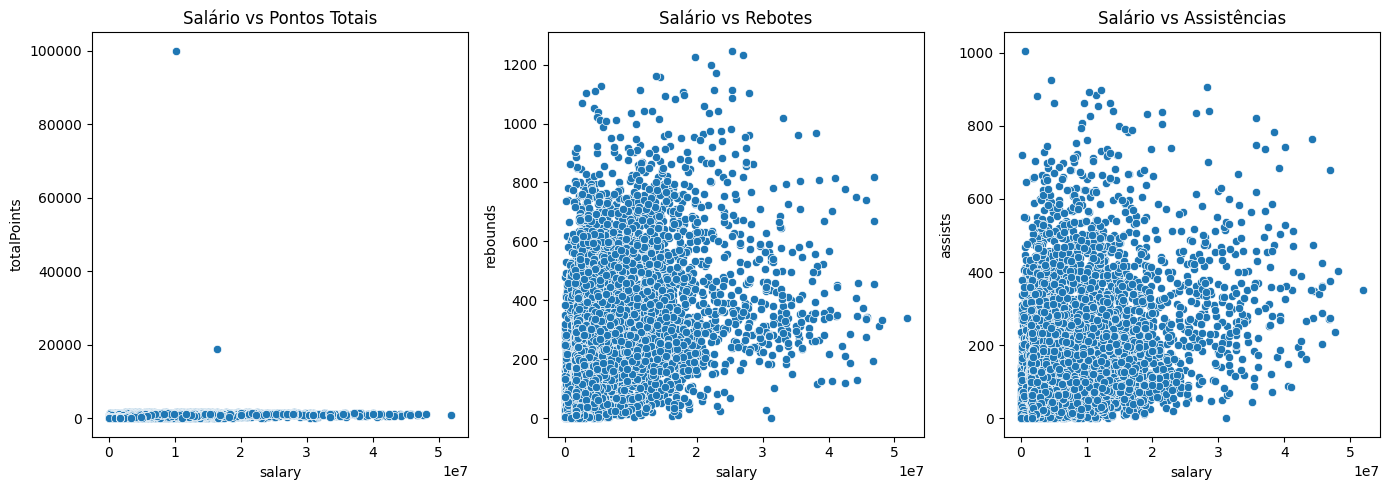

In [97]:
# Construindo Scatterplot de relação ao salário de cada jogador com seu desempenho, levando em consideração os pontos totais, rebotes e assistências
cols = ['salary', 'totalPoints', 'rebounds', 'assists']
df_filtrado = NBAunido[cols]


# Analisar a relação entre salário e pontos, rebotes, assistências
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='salary', y='totalPoints', data=df_filtrado)
plt.title('Salário vs Pontos Totais')

plt.subplot(1, 3, 2)
sns.scatterplot(x='salary', y='rebounds', data=df_filtrado)
plt.title('Salário vs Rebotes')

plt.subplot(1, 3, 3)
sns.scatterplot(x='salary', y='assists', data=df_filtrado)
plt.title('Salário vs Assistências')

plt.tight_layout()
plt.show()

## 4. Relação entre Salário e Turnovers

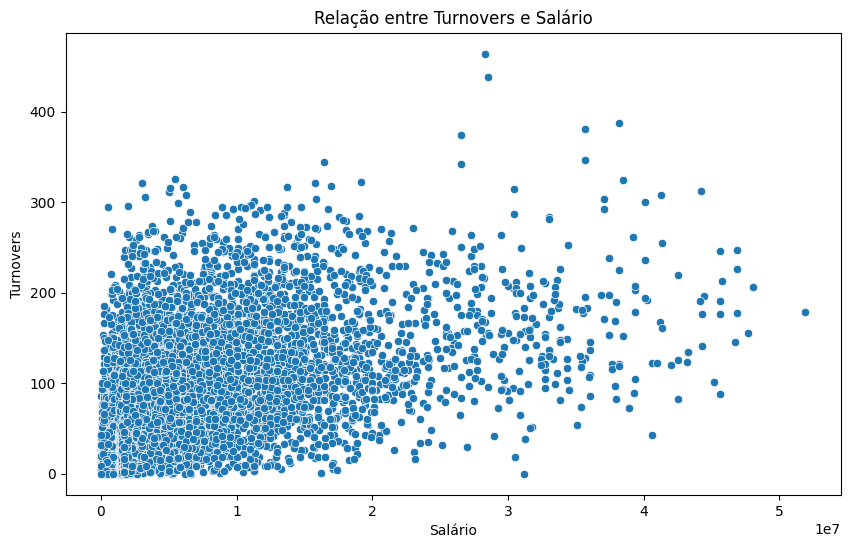

In [100]:
cols = ['salary', 'turnovers']
df_salario_turnovers = NBAunido[cols]

# Visualizar a relação entre turnovers e salário
plt.figure(figsize=(10, 6))
sns.scatterplot(x='salary', y='turnovers', data=df_salario_turnovers)
plt.title('Relação entre Turnovers e Salário')
plt.xlabel('Salário')
plt.ylabel('Turnovers')
plt.show()

## 5. Relação de quantidade de jogadores por temporada

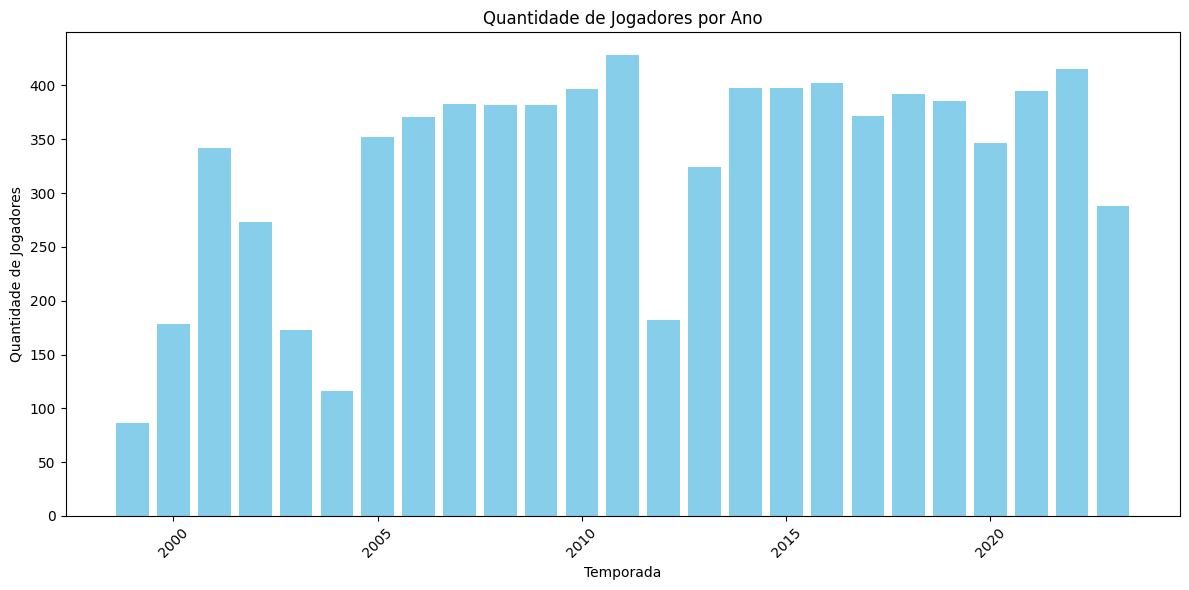

In [106]:
jogadores = NBAunido.groupby('year').size().reset_index(name='count')


plt.figure(figsize=(12, 6))
plt.bar(jogadores['year'], jogadores['count'], color='skyblue')
plt.xlabel('Temporada')
plt.ylabel('Quantidade de Jogadores')
plt.title('Quantidade de Jogadores por Ano')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()